In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

Chcę sprawdzić jak popularne były frazy związane z AI w wyszukiwaniach Google na przestrzeni ostatnich 10 lat.

In [28]:
pytrends = TrendReq(hl='pl-PL', tz=360, timeout=(10, 25))

keywords = ["ai", "artificial intelligence", "chatgpt", "sztuczna inteligencja"]

pytrends.build_payload(keywords, timeframe='2015-01-01 2025-01-01', geo='PL')

df = pytrends.interest_over_time()
df = df.drop(columns=['isPartial'])
df_first_two = df.groupby(df.index.year).head(2)
print(df_first_two)


             ai  artificial intelligence  chatgpt  sztuczna inteligencja
date                                                                    
2015-01-01    3                        0        0                      1
2015-02-01    3                        0        0                      0
2016-01-01    3                        0        0                      0
2016-02-01    3                        0        0                      1
2017-01-01    3                        0        0                      0
2017-02-01    3                        0        0                      0
2018-01-01    3                        0        0                      1
2018-02-01    3                        0        0                      1
2019-01-01    3                        0        0                      1
2019-02-01    3                        0        0                      1
2020-01-01    3                        0        0                      1
2020-02-01    3                        0        0  

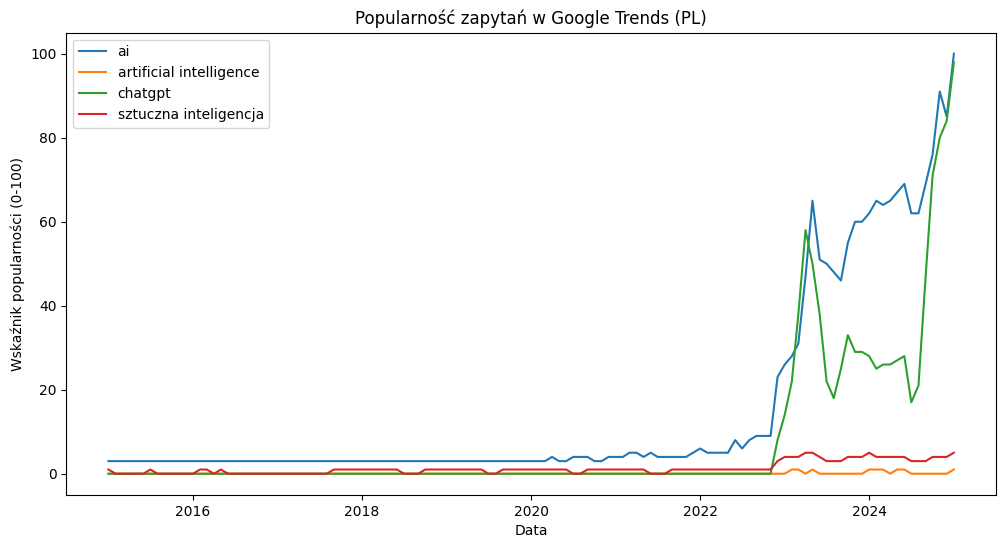

In [17]:
plt.figure(figsize=(12,6))
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
    
plt.title('Popularność zapytań w Google Trends (PL)')
plt.xlabel('Data')
plt.ylabel('Wskaźnik popularności (0-100)')
plt.legend()
plt.show()


Na wykresi widać, że około roku 2023 nastąpił wzrost liczby wyszukań, co pokrywa się z premierą ChataGPT od OpenAI.

Poniżej prognozowany jest trend związany z wyszukiwaniem frazy "ai" oraz "chatgpt", aby pokazać:
1. Czy zainteresowanie tematem AI wzrośnie
2. Czy ChatGPT będzie potencjalnie coraz popularniejszym narzędziem Generative AI.

13:04:11 - cmdstanpy - INFO - Chain [1] start processing
13:04:12 - cmdstanpy - INFO - Chain [1] done processing


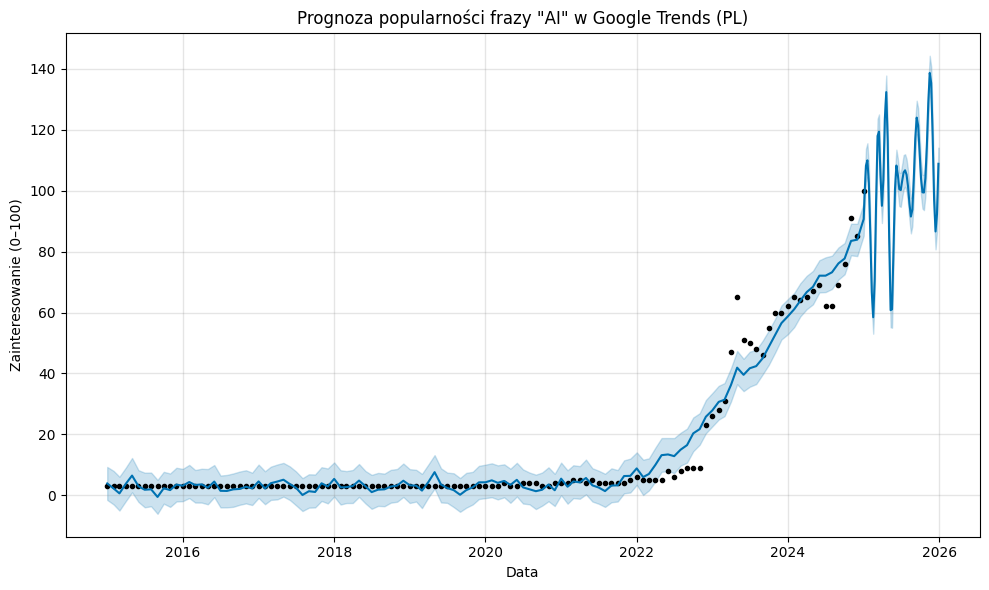

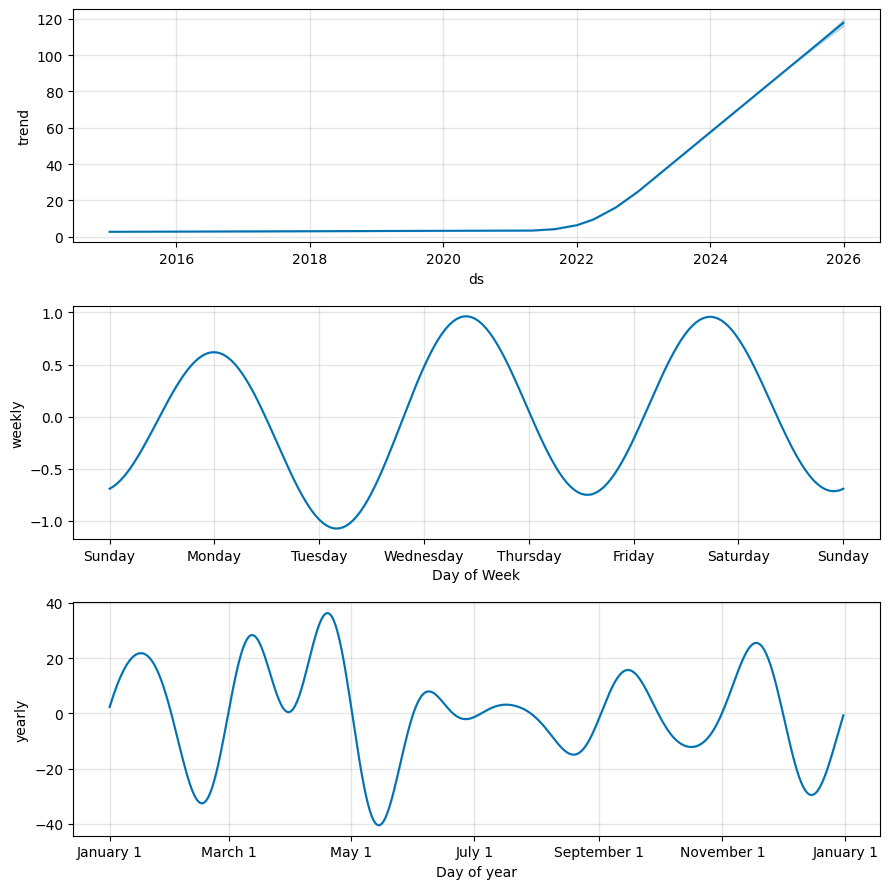

Prognoza na kolejne 52 tygodnie:
        ds       yhat  yhat_lower  yhat_upper
2025-01-05  98.333418   93.145775  103.735842
2025-01-12 108.205133  103.003218  113.797470
2025-01-19 109.968351  104.475034  115.579151
2025-01-26 102.450558   96.999468  108.274909
2025-02-02  85.808585   80.116333   90.942337
2025-02-09  66.737619   61.345612   72.370412
2025-02-16  58.454390   53.039400   64.120741
2025-02-23  70.366459   64.735042   76.354077
2025-03-02  96.583563   90.873583  102.382707
2025-03-09 117.978847  112.557492  123.567541
2025-03-16 119.380568  114.035077  125.051051
2025-03-23 105.109732   99.399186  110.618153
2025-03-30  95.043695   89.379495  100.726797
2025-04-06 103.568724   98.003092  108.824887
2025-04-13 123.417951  118.139347  128.368584
2025-04-20 132.373961  126.938681  137.813238
2025-04-27 116.360221  111.053697  122.005254
2025-05-04  84.547366   79.069086   90.276711
2025-05-11  60.790775   55.166471   66.299688
2025-05-18  61.053360   54.997398   66.718652
2

In [21]:
data = df[['ai']].copy()

# format dla Propheta
df_prophet = data.reset_index()
df_prophet.columns = ['ds', 'y']

# model
model = Prophet(weekly_seasonality=True, daily_seasonality=False)
model.fit(df_prophet)

# przyszłość – 52 tygodnie do przodu
future = model.make_future_dataframe(periods=52, freq='W')

# prognoza
forecast = model.predict(future)

# wykres prognozy
fig = model.plot(forecast)
plt.title('Prognoza popularności frazy "AI" w Google Trends (PL)')
plt.xlabel('Data')
plt.ylabel('Zainteresowanie (0–100)')
plt.tight_layout()
plt.show()

# składowe
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()

# tabela prognozy
print("Prognoza na kolejne 52 tygodnie:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(52).to_string(index=False))

13:07:25 - cmdstanpy - INFO - Chain [1] start processing
13:07:25 - cmdstanpy - INFO - Chain [1] done processing


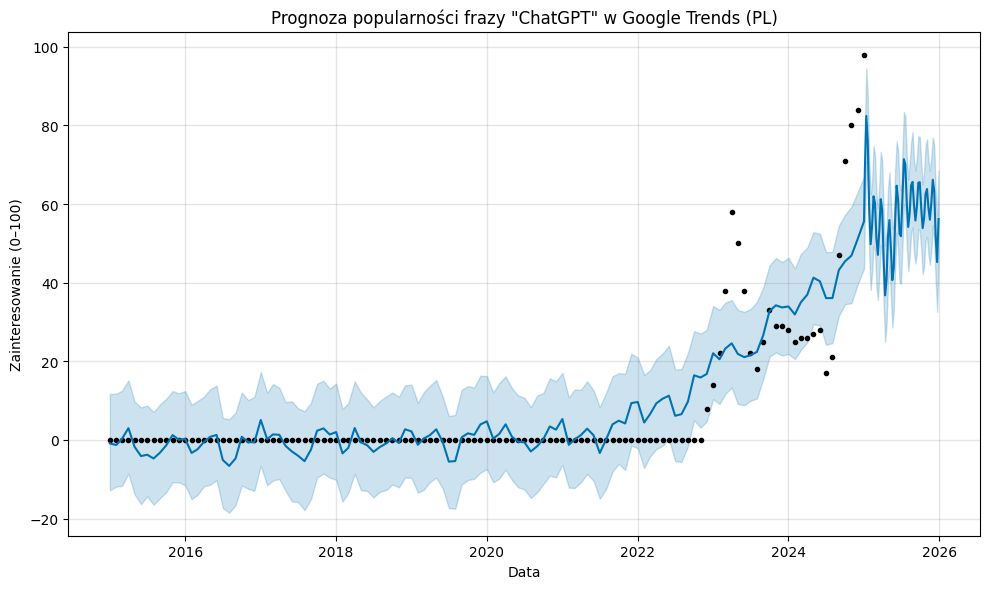

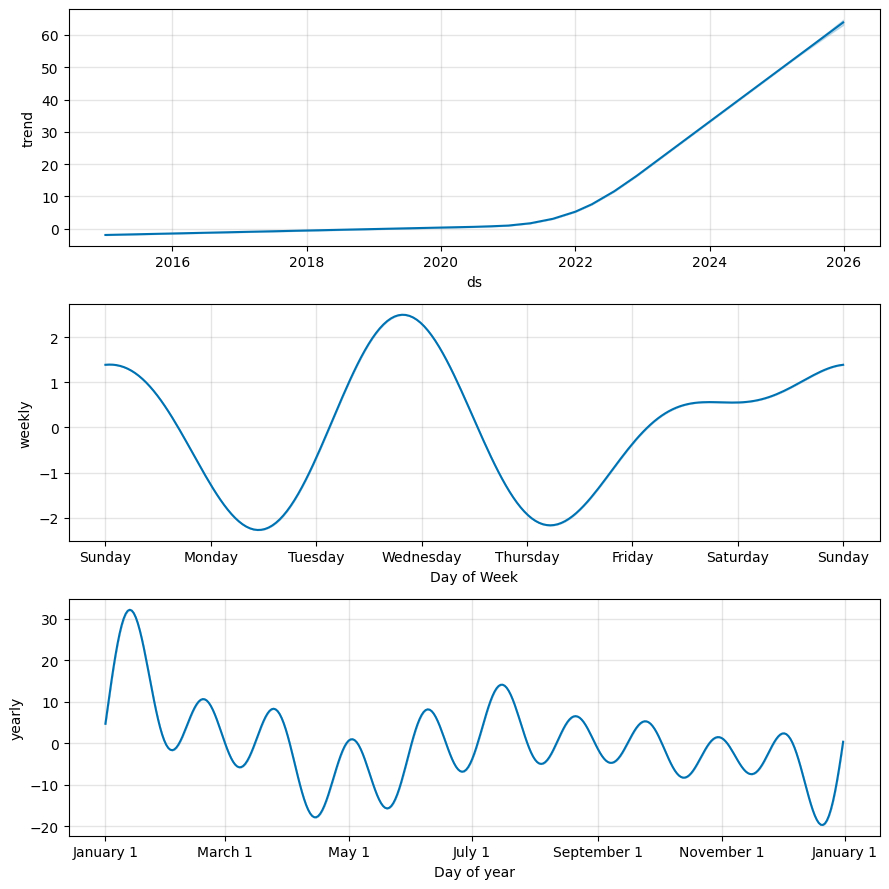

Prognoza na kolejne 52 tygodnie:
        ds      yhat  yhat_lower  yhat_upper
2025-01-05 68.512041   56.065120   79.997705
2025-01-12 82.428795   70.927619   94.536976
2025-01-19 75.907867   64.000402   87.400482
2025-01-26 58.955216   46.891177   71.119120
2025-02-02 49.797331   38.153399   62.506357
2025-02-09 54.425124   42.468873   65.565250
2025-02-16 61.992465   49.377997   74.750202
2025-02-23 60.313439   48.316323   72.711243
2025-03-02 51.258327   38.962070   62.616804
2025-03-09 47.080172   35.605093   59.022286
2025-03-16 53.397275   41.511789   65.086934
2025-03-23 61.250612   49.616676   73.338402
2025-03-30 58.520200   46.981552   71.127046
2025-04-06 45.911586   34.421905   57.920293
2025-04-13 36.788915   24.931817   49.440474
2025-04-20 40.776622   29.096380   53.118553
2025-04-27 51.836188   39.822827   63.800510
2025-05-04 55.946627   44.269764   68.067321
2025-05-11 48.704930   36.567474   60.789884
2025-05-18 40.656167   28.600964   53.528060
2025-05-25 43.758606  

In [27]:
data_2 = df[['chatgpt']].copy()

df_prophet_2 = data_2.reset_index()
df_prophet_2.columns = ['ds', 'y']

model_2 = Prophet(weekly_seasonality=True, daily_seasonality=False)
model_2.fit(df_prophet_2)

future_2 = model_2.make_future_dataframe(periods=52, freq='W')

forecast_2 = model_2.predict(future_2)

fig = model_2.plot(forecast_2)
plt.title('Prognoza popularności frazy "ChatGPT" w Google Trends (PL)')
plt.xlabel('Data')
plt.ylabel('Zainteresowanie (0–100)')
plt.tight_layout()
plt.show()

fig2 = model_2.plot_components(forecast_2)
plt.tight_layout()
plt.show()

print("Prognoza na kolejne 52 tygodnie:")
print(forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(52).to_string(index=False))

ChatGPT: wartości głównie w zakresie ~35–70
AI: wartości głównie w zakresie ~85–140
1. Ogólny obraz roku 2025
Początek roku: wartości raczej wysokie
Wiosna (kwiecień–maj): wyraźne spowolnienie / dołek
Lato: ponowny wzrost i stabilizacja
Jesień: kolejny silniejszy wzrost
Grudzień: ponowne osłabienie

➡️ Czyli:
Sezonowość roczna z dołkiem wiosennym i szczytem jesiennym.

Pojawia się w obu prognozach mimo różnych skal.

### Wnioski
1. Dane wejściowe

Analiza obejmuje wieloletnie dane dotyczące popularności wyszukiwań fraz związanych ze sztuczną inteligencją („AI”, „ChatGPT”) w Polsce, pozyskane z narzędzia Google Trends.
Wartości przedstawiają względne zainteresowanie użytkowników w skali od 0 do 100, co umożliwia obserwację zmian trendu w czasie, lecz nie odzwierciedla bezwzględnej liczby wyszukiwań.

2. Wyraźny trend wzrostowy

Zarówno dla frazy „AI”, jak i „ChatGPT” widoczny jest silny trend wzrostowy w ostatnich latach, szczególnie po roku 2022.
Model Prophet potwierdza dynamiczny wzrost zainteresowania tematyką sztucznej inteligencji i wskazuje na utrzymanie tendencji rosnącej w najbliższym okresie prognozy.
Największa dynamika zmian dotyczy frazy „ChatGPT”, co można wiązać z nagłym wzrostem popularności narzędzi generatywnej AI.

3. Prognoza na kolejne tygodnie

Prognoza wygenerowana przez model Prophet wskazuje na dalszy wzrost zainteresowania analizowanymi frazami w perspektywie kolejnych 52 tygodni.
Zakres niepewności prognozy pozostaje stosunkowo szeroki, co sugeruje możliwość wystąpienia wahań krótkookresowych, jednak ogólny kierunek zmian pozostaje rosnący.

4. Zalecenia

Planowanie zasobów i budżetu: wiosna to okres słabszy dla wyszukiwań związanych z AI, jesień z kolei - najsilniejszy. Może to być związane z początkiem roku szkolnego i akademickiego. Gdyby faktycznie używać takiej analizo do formułowania wniosków biznesowych, to pewnie można w okresach wzmożonej aktywności zachęcać uczniów i studentów do kupowania premium w atrakcyjnych cenach, albo w drugą stronę - robić to w okresach o zmniejszonym ruchu (w zależności od strategii).